# Environmental Analytics Week 10
# Additional Information: Sentinelsat on a Dublin Example
B. Schoen-Phelan

31 March 2022

Please see the other case study for further references.

First we install our necessry libraries. Some of them are familiar and some are new. Please see the week 10 case study notebook for links on rasterio.

In [1]:
!pip install sentinelsat
!pip install rasterio
!pip install folium
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install geopandas
!pip install descartes 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
     |████████████████████████████████| 1.0 MB 17.2 MB/s 
     |████████████████████████████████| 16.7 MB 393 kB/s 
     |████████████████████████████████| 6.3 MB 51.1 MB/s 


In [1]:
from sentinelsat import SentinelAPI
import geopandas as gpd
import folium
import numpy as np
import matplotlib.pyplot as plt 

You will need to create your own user name and password for the copernicus hub in order to use the service. Please replace the placeholder information with your own user name and password information. 

Please register here for the service: https://scihub.copernicus.eu/dhus


In [21]:
user = 'your user' 
password = 'your password' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This is a familiar data file from our data_share folder. This will help us to define a search region which we will use to define a mask by which we will retrieve a specific location's sentinel-2 data.

In [18]:
fp_counties = "/content/drive/My Drive/data_share/counties_gen.shp"

counties = gpd.read_file(fp_counties)

counties

,COUNTYNAME,GEOGID,LAND_AREA,TOTAL_AREA,CREATEDATE,geometry
0,Limerick City,C20,28.395591,30.774555,27-03-2012,"POLYGON ((-8.65392 52.68999, -8.65268 52.68928..."
1,Limerick County,C21,2654.656530,2725.346647,27-03-2012,"POLYGON ((-8.47603 52.75350, -8.47521 52.74691..."
2,North Tipperary,C22,1992.195059,2046.393944,27-03-2012,"POLYGON ((-8.07169 53.16205, -8.07094 53.16138..."
3,South Tipperary,C23,2255.694719,2258.870523,27-03-2012,"POLYGON ((-7.62617 52.73369, -7.61473 52.72539..."
4,Waterford City,C24,38.345886,41.639886,27-03-2012,"POLYGON ((-7.11207 52.26690, -7.10662 52.26675..."
5,Waterford County,C25,1797.207706,1816.924943,27-03-2012,"MULTIPOLYGON (((-7.61002 52.06429, -7.60994 52..."
6,Galway City,C26,49.997557,50.716863,27-03-2012,"MULTIPOLYGON (((-9.06364 53.31926, -9.06148 53..."
7,Galway County,C27,5796.096470,6100.724985,27-03-2012,"MULTIPOLYGON (((-10.28880 53.61846, -10.28852 ..."
8,Leitrim County,C28,1502.512722,1588.710829,27-03-2012,"POLYGON ((-8.31237 54.47411, -8.31154 54.47277..."
9,Mayo County,C29,5350.620016,5589.443709,27-03-2012,"MULTIPOLYGON (((-9.96516 54.02347, -9.96501 54..."


In [7]:
type(counties)

geopandas.geodataframe.GeoDataFrame

In [19]:
dublin = counties[counties['COUNTYNAME'] == 'Dublin City']
dublin

,COUNTYNAME,GEOGID,LAND_AREA,TOTAL_AREA,CREATEDATE,geometry
16,Dublin City,C02,116.581205,117.667128,27-03-2012,"POLYGON ((-6.22569 53.41099, -6.22295 53.41046..."


In [9]:
type(dublin)

geopandas.geodataframe.GeoDataFrame

It's always a good idea to save these intermediate results to file in case you'd like to use the information later again.

In [10]:
dublin.to_file("dublin.shp")


We have used folium before. Let's use it here to display where we are and if we've chosen the correct area.

In [11]:
m = folium.Map([53.29387813050381, -6.241592348604317], zoom_start=10)
folium.GeoJson(dublin).add_to(m)
m

In [12]:
from shapely.geometry import MultiPolygon, Polygon

The following will retrieve the footprint information for our specified location.

In [13]:
footprint = None
for i in dublin['geometry']:
    footprint = i

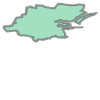

In [14]:
footprint

In [15]:
footprint.bounds

(-6.38696693531868, 53.29888263371934, -6.113090271214342, 53.4109925582391)

In [16]:
len(footprint.exterior.coords)

532

These are quite a lot of coordinate details. The sentinelsat api is not able to handle a loction specified to such a fine grained level of detail. We have to simplify the mask for the range search.

In [17]:
simplified_footprint = footprint.simplify(0.05, preserve_topology=False)

In [18]:
len(simplified_footprint.exterior.coords)

7

This looks much better for sentinelsat searches:

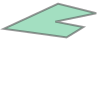

In [19]:
simplified_footprint

Sentinelsat has a limited date range, see the copernicus web site: 
https://scihub.copernicus.eu/dhus/#/home

The value for cloud coverage is quite high here. The reason is that this is an Irish location and we experience substantial cloud coverage which often makes this specific data not suitable for meaningful analysis for the Irish context. Other data such as InSAR can be more suitable. However, many other locations on the planet do not suffer from substantial cloud coverage. Ideally, you'd be looking for cloud coverage under 20%. 

In [25]:
products = api.query(simplified_footprint,
                     date = ('20220101', '20220110'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,50)
                    )

In [26]:
products_gdf = api.to_geodataframe(products)
# the following 2 lines only make sense if you are likely going to 
# get many data sets offered. This specific example is small
# and we retrieve only one data set.
# products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
# products_gdf_sorted
products_gdf.head()

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
138317a6-0456-4dec-badd-d1005606c329,S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-01-02T11:35:01.024Z, Instrument: MS...",false,2022-01-02 14:27:30,2022-01-02 11:35:01.024,2022-01-02 11:35:01.024,2022-01-02 17:25:22.836,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_VGS2_20220102T142730_S2022...,S2A_OPER_MSI_L2A_TL_VGS2_20220102T142730_A0341...,S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_2...,138317a6-0456-4dec-badd-d1005606c329,"MULTIPOLYGON (((-5.86468 53.11988, -5.79074 54..."


The following process will take rather long, depending on your internet connection.

Please note how the key that I am using here matches the key in the output above. If you are looking for different data, this key needs to be amended, of course.

In [27]:
api.download("138317a6-0456-4dec-badd-d1005606c329")


MD5 checksumming:   0%|          | 0.00/948M [00:00<?, ?B/s]

{'Creation Date': datetime.datetime(2022, 1, 2, 17, 26, 17, 93000),
 'Ingestion Date': datetime.datetime(2022, 1, 2, 17, 25, 22, 836000),
 'Online': True,
 'date': datetime.datetime(2022, 1, 2, 11, 35, 1, 24000),
 'downloaded_bytes': 948201021,
 'footprint': 'POLYGON((-7.3825684 53.14941085734564,-7.3483887 53.22706494510041,-7.2838135 53.372539475908525,-7.218811 53.51794652928458,-7.1536865 53.663375462856,-7.0881042 53.80877142822041,-7.021942 53.95412791555424,-6.9556274 54.09952084263935,-6.9425964 54.127996805801565,-5.790741 54.10530483528773,-5.864685 53.119880621881606,-7.3825684 53.14941085734564))',
 'id': '138317a6-0456-4dec-badd-d1005606c329',
 'md5': '87aa9638f3b6375e6314c028e8bdb12b',
 'path': 'S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.zip',
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('138317a6-0456-4dec-badd-d1005606c329')/Products('Quicklook')/$value",
 'size': 948201021,
 'title': 'S2A_MSIL2A_20220102T113501_N0301_R080_T29

Check in the left bar where your colab files are. You will notice that a zip file has downloaded. This first needs to be unpacked.

In [30]:
!unzip S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.zip

Archive:  S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.zip
   creating: S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/
 extracting: S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/MTD_MSIL2A.xml  
 extracting: S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/manifest.safe  
 extracting: S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/INSPIRE.xml  
   creating: S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/rep_info/
   creating: S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/DATASTRIP/
   creating: S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/AUX_DATA/
   creating: S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/HTML/
   creating: S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/GRANULE/
 extracting: S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/rep_info/S2_PDI_Level-2A_Datastrip_Metada

In [2]:
import rasterio as rio
from rasterio.plot import show
import rasterio.mask
import fiona

Check in your left bar under the colab content files for the correct path and amend for your example.

In order to get the path correctly, you can just right click into the browser view on the left and choose copy path.

In [4]:
# Open Bands 4, 3 and 2 with Rasterio
# R10 = '/content/S2B_MSIL2A_20210105T114359_N0214_R123_T29UPV_20210105T125015.SAFE/GRANULE/L2A_T29UPV_A020026_20210105T114448/IMG_DATA/R10m'

# red: band 4 in sentinel-2
b4 = rio.open('/content/S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/GRANULE/L2A_T29UPV_A034111_20220102T113458/IMG_DATA/R10m/T29UPV_20220102T113501_B04_10m.jp2')
# b4 = rio.open('/content/S2B_MSIL2A_20210105T114359_N0214_R123_T29UPV_20210105T125015.SAFE/GRANULE/L2A_T29UPV_A020026_20210105T114448/IMG_DATA/R10m/T29UPV_20210105T114359_B04_10m.jp2')

# green: band 3 in sentinel-2
b3 = rio.open('/content/S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/GRANULE/L2A_T29UPV_A034111_20220102T113458/IMG_DATA/R10m/T29UPV_20220102T113501_B03_10m.jp2')
# b3 = rio.open('/content/S2B_MSIL2A_20210105T114359_N0214_R123_T29UPV_20210105T125015.SAFE/GRANULE/L2A_T29UPV_A020026_20210105T114448/IMG_DATA/R10m/T29UPV_20210105T114359_B03_10m.jp2')

# blue: band 2 in sentinel-2
b2 = rio.open('/content/S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/GRANULE/L2A_T29UPV_A034111_20220102T113458/IMG_DATA/R10m/T29UPV_20220102T113501_B02_10m.jp2')
# b2 = rio.open('/content/S2B_MSIL2A_20210105T114359_N0214_R123_T29UPV_20210105T125015.SAFE/GRANULE/L2A_T29UPV_A020026_20210105T114448/IMG_DATA/R10m/T29UPV_20210105T114359_B02_10m.jp2')

# nir band (needed for later vegetation analysis)
b8 = rio.open('/content/S2A_MSIL2A_20220102T113501_N0301_R080_T29UPV_20220102T142730.SAFE/GRANULE/L2A_T29UPV_A034111_20220102T113458/IMG_DATA/R10m/T29UPV_20220102T113501_B08_10m.jp2')
# b8 = rio.open('/content/S2B_MSIL2A_20210105T114359_N0214_R123_T29UPV_20210105T125015.SAFE/GRANULE/L2A_T29UPV_A020026_20210105T114448/IMG_DATA/R10m/T29UPV_20210105T114359_B08_10m.jp2')

Notice how all the files are in jp2 file format. For more on jp2: https://fileinfo.com/extension/jp2


In [5]:
# count is the number of bands
b4.count, b4.width, b4.height

(1, 10980, 10980)

In [33]:
type(b4)

rasterio.io.DatasetReader

In [34]:
b4.dtypes

('uint16',)

In [35]:
b4.driver

'JP2OpenJPEG'

In [36]:
b4.crs

CRS.from_epsg(32629)

This coordinate system is a cartesian 2D CRS, defining the UTM zone 29.

More on UTM zones: https://www.usgs.gov/faqs/what-does-term-utm-mean-utm-better-or-more-accurate-latitudelongitude

In [37]:
b4.meta

{'count': 1,
 'crs': CRS.from_epsg(32629),
 'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'height': 10980,
 'nodata': None,
 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 6000000.0),
 'width': 10980}

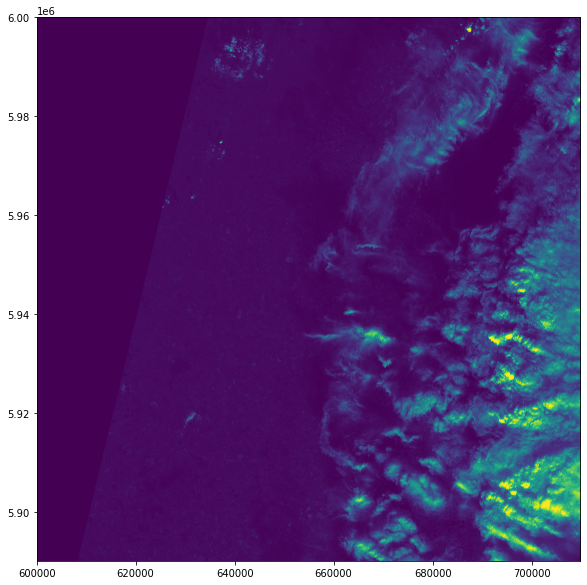

In [38]:
# naive plotting of just one band
# this plot takes a little while to run and won't be very informative
fig, ax = plt.subplots(1, figsize=(10, 10))
show(b4, ax=ax) # remember: we are looking only into the red band
plt.show()

In [6]:
import matplotlib.pyplot as plt
from rasterio import plot

Text(0.5, 1.0, 'Blue')

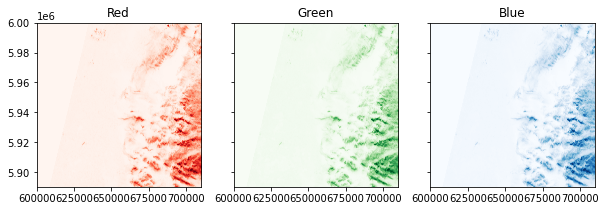

In [40]:
# let's view the different bands next to each other
# this plotting takes a little while
%matplotlib inline

# Initialize subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

# Plot Red, Green and Blue (rgb)
show((b4, 1), cmap='Reds', ax=ax1)
show((b3, 1), cmap='Greens', ax=ax2)
show((b2, 1), cmap='Blues', ax=ax3)

# Add titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")

In [7]:
# get stats for b4 as a representative
print("Min value: ", b4.read().min())
print("Max value: ", b4.read().max())
print("Average value: ", b4.read().mean())
print("Median value: ", np.median(b4.read()))

Min value:  0
Max value:  16376
Average value:  1325.7631976917794
Median value:  449.0


One of the issues in rasterio for display is that it cannot handle the different colour information ranges. We need to normalise the information.

In [8]:
# read grid values into numpy arrays
red = b4.read(1)
green = b3.read(1)
blue = b2.read(1)

# Function to normalize the grid values
def normalise(array):
    """Normalises numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalise the bands
redn = normalise(red)
greenn = normalise(green)
bluen = normalise(blue)

print("Normalised bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())

Normalised bands
0.0 - 1.0 mean: 0.08095769404566328
0.0 - 1.0 mean: 0.08191829133056217
0.0 - 1.0 mean: 0.08191468033766063


In [9]:
red_uint16 = (redn *255.999).astype(np.uint16)
green_uint16 = (greenn *255.999).astype(np.uint16)
blue_uint16 = (bluen *255.999).astype(np.uint16)

In [10]:
print(red_uint16.min(), '-', red_uint16.max(), 'mean:', red_uint16.mean())
print(green_uint16.min(), '-', green_uint16.max(), 'mean:', green_uint16.mean())
print(blue_uint16.min(), '-', blue_uint16.max(), 'mean:', blue_uint16.mean())

0 - 255 mean: 20.32686761158722
0 - 255 mean: 20.573214803534164
0 - 255 mean: 20.575882777429406


In [11]:
red_uint16.shape

(10980, 10980)

In [12]:
# Create RGB natural colour composite
rgb = np.dstack((redn, greenn, bluen))
rgb_uint16 = (rgb * 255.999).astype(np.uint16)

In [13]:
# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(red_uint16,1) 
    rgb.write(green_uint16,2) 
    rgb.write(blue_uint16,3) 
    rgb.close()

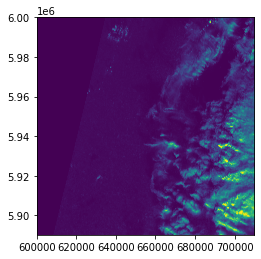

In [15]:
true_image = rasterio.open(r"RGB.tiff")
plot.show(true_image)

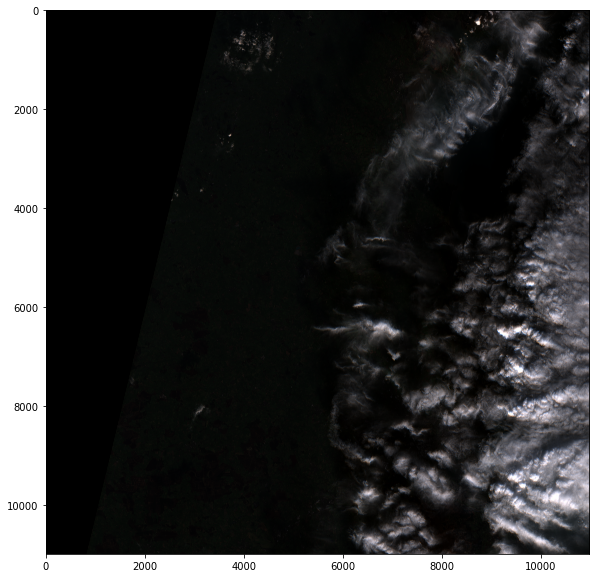

<function matplotlib.pyplot.show>

In [16]:
true = rio.open(r"RGB.tiff")
fig, ax = plt.subplots(1, figsize=(10, 10))
show(true.read([1,2,3]))
plt.show

In [20]:
dublin_projected = dublin.to_crs(epsg=32629)

In [21]:
with rio.open("RGB.tiff") as src:
    out_image, out_transform = rio.mask.mask(src, dublin_projected.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("RGB_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

Here we start getting something that looks like something we know.

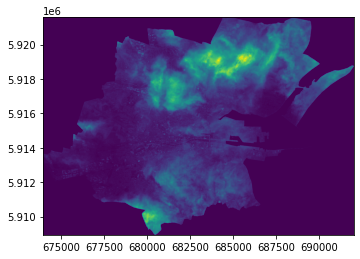

In [22]:
clipped_image = rasterio.open(r"RGB_masked.tif")
plot.show(clipped_image)

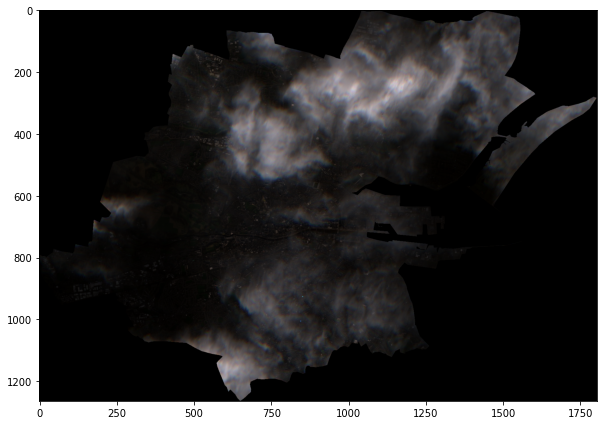

<function matplotlib.pyplot.show>

In [23]:
msk = rio.open(r"RGB_masked.tif")
fig, ax = plt.subplots(1, figsize=(10, 10))
show(msk.read([1,2,3]))
plt.show

In [24]:
red = b4.read()
nir = b8.read()

We are going to calculate a vegetation index. More on the vegetation index can be gotten here: https://up42.com/blog/tech/5-things-to-know-about-ndvi
 
and 

here: 
https://eos.com/blog/ndvi-faq-all-you-need-to-know-about-ndvi/

In [25]:
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [26]:
type(ndvi)

numpy.ndarray

In [27]:
ndvi

array([[[        nan,         nan,         nan, ...,  0.1511194 ,
          0.09729188,  0.041841  ],
        [        nan,         nan,         nan, ...,  0.15538608,
          0.16596639,  0.07707708],
        [        nan,         nan,         nan, ...,  0.20766129,
          0.22054381,  0.16754478],
        ...,
        [        nan,         nan,         nan, ..., -0.15531915,
         -0.1010101 , -0.02673797],
        [        nan,         nan,         nan, ..., -0.10996917,
         -0.12653061, -0.12841254],
        [        nan,         nan,         nan, ..., -0.11      ,
         -0.10082305, -0.12114537]]])

In [28]:
meta = b4.meta

meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

with rasterio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32))

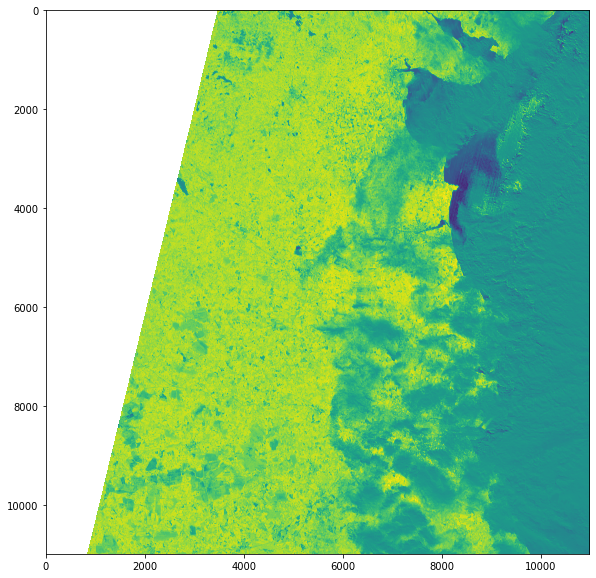

<function matplotlib.pyplot.show>

In [29]:
ndvi_img = rio.open(r"NDVI.tif")
fig, ax = plt.subplots(1, figsize=(10, 10))
show(ndvi_img.read())
plt.show

Learn more about the vegetation index: https://eos.com/blog/ndvi-faq-all-you-need-to-know-about-ndvi/
